In [122]:
import os
import pandas as pd
import numpy 
import urllib
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [123]:
url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
path = os.path.join("data","covid")

In [124]:
os.makedirs(path,exist_ok=True)
csv_path = os.path.join(path,"WHO-COVID-19global-data.csv")
urllib.request.urlretrieve(url,csv_path)

('data\\covid\\WHO-COVID-19global-data.csv',
 <http.client.HTTPMessage at 0x27508e30d30>)

In [125]:
df = pd.read_csv(csv_path, parse_dates=["Date_reported"],index_col = "Date_reported")

In [126]:
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...
2021-11-04,ZW,Zimbabwe,AFRO,44,133091,1,4684
2021-11-05,ZW,Zimbabwe,AFRO,21,133112,1,4685
2021-11-06,ZW,Zimbabwe,AFRO,34,133146,0,4685


In [127]:
# finding time interval of the dataset 
df.index.max() - df.index.min()
# State of the country at the begining of lockdown
df.asof("2021-10-21")

ValueError: asof requires a sorted index

In [128]:
df = df.loc[df["Country"] == "Latvia"]
df

,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,
2020-01-03,LV,Latvia,EURO,0,0,0,0
2020-01-04,LV,Latvia,EURO,0,0,0,0
2020-01-05,LV,Latvia,EURO,0,0,0,0
2020-01-06,LV,Latvia,EURO,0,0,0,0
2020-01-07,LV,Latvia,EURO,0,0,0,0
...,...,...,...,...,...,...,...
2021-11-04,LV,Latvia,EURO,2718,224513,45,3354
2021-11-05,LV,Latvia,EURO,2347,226860,47,3401
2021-11-06,LV,Latvia,EURO,1821,228681,43,3444


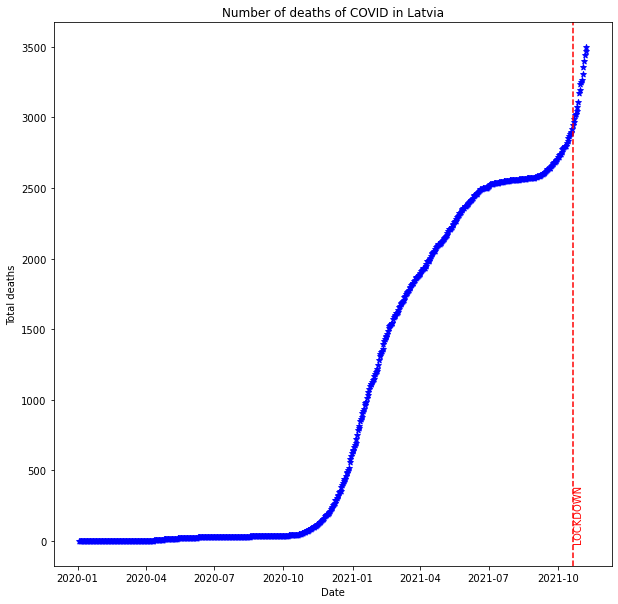

In [129]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,
        df['Cumulative_deaths'],
        color='blue',marker="*")

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total deaths",
       title="Number of deaths of COVID in Latvia")

plt.axvline(dt.datetime(2021, 10, 21),ls = "--",c="red")
plt.text(dt.datetime(2021, 10, 21),0,'LOCKDOWN',rotation=90,c="red")

plt.show()

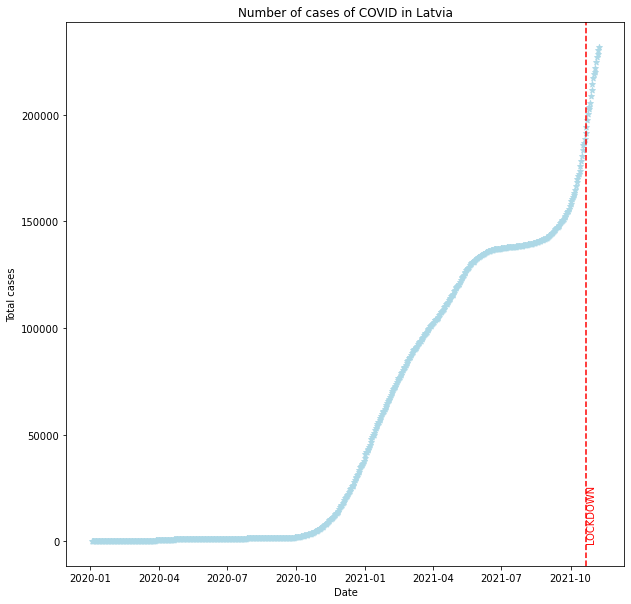

In [130]:
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,
        df['Cumulative_cases'],
        color='lightblue',marker="*")

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Total cases",
       title="Number of cases of COVID in Latvia")

plt.axvline(dt.datetime(2021, 10, 21),ls = "--",c="red")
plt.text(dt.datetime(2021, 10, 21),0,'LOCKDOWN',rotation=90,c="red")

plt.show()